In [6]:
#import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import re

In [7]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [8]:
import pandas as pd

dataset = pd.read_csv('diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# Menampilkan dimensi dataset (jumlah baris dan kolom)
print("Dimensi dataset:", dataset.shape)

# Menampilkan nama-nama fitur/kolom
print("Fitur yang tersedia:", dataset.columns.tolist())


Dimensi dataset: (768, 9)
Fitur yang tersedia: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [21]:
x = dataset[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = dataset['Outcome']


In [22]:
# Memisahkan fitur (X) dan label (y)
X = dataset.drop(columns='Outcome')  # Semua kolom kecuali 'Outcome'
y = dataset['Outcome']               # Label target


In [10]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target/label (y)
X = dataset.drop(columns='Outcome')  # Asumsinya kolom target bernama 'Outcome'
y = dataset['Outcome']

# Membagi data: 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cek jumlah data
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 614
Jumlah data uji: 154


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model
model = DecisionTreeClassifier()

# Latih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Decision Tree:", accuracy)


Akurasi model Decision Tree: 0.7337662337662337


In [12]:
# Membuat Model Dicision Tree
tree_model = DecisionTreeClassifier()

In [13]:
tree_model.fit(x,y)

DecisionTreeClassifier()

In [14]:
print(tree_model.feature_names_in_)


['Pregnancies' 'Glucose' 'BloodPressure' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [15]:
import pandas as pd

# Input dengan nama kolom yang sesuai dengan model
input_data = pd.DataFrame([[0, 120, 60, 400, 40, 0.335, 50]],
                          columns=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

tree_model.predict(input_data)


array([1])

In [16]:
export_graphviz(
    tree_model,
    out_file = "diabetes_tree.dot",
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
    class_names = ['Diabetes', 'TidakDiabetes'],
    rounded = True,
    filled = True
)


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (misalnya Pima Indian Diabetes Dataset)
# Jika file CSV: df = pd.read_csv('diabetes.csv')
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)
df = data.frame

# Contoh: gunakan beberapa fitur saja (karena ini regresi asli, kita ubah jadi klasifikasi contoh)
# Misalnya target: jika nilai target > 140 maka dianggap "1" (diabetes), selain itu "0"
df['target'] = (df['target'] > 140).astype(int)

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()

# Latih model
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Hitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", round(akurasi * 100, 2), "%")

# Tambahan: confusion matrix dan classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi: 70.79 %

Confusion Matrix:
[[37 12]
 [14 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        49
           1       0.68      0.65      0.67        40

    accuracy                           0.71        89
   macro avg       0.70      0.70      0.70        89
weighted avg       0.71      0.71      0.71        89



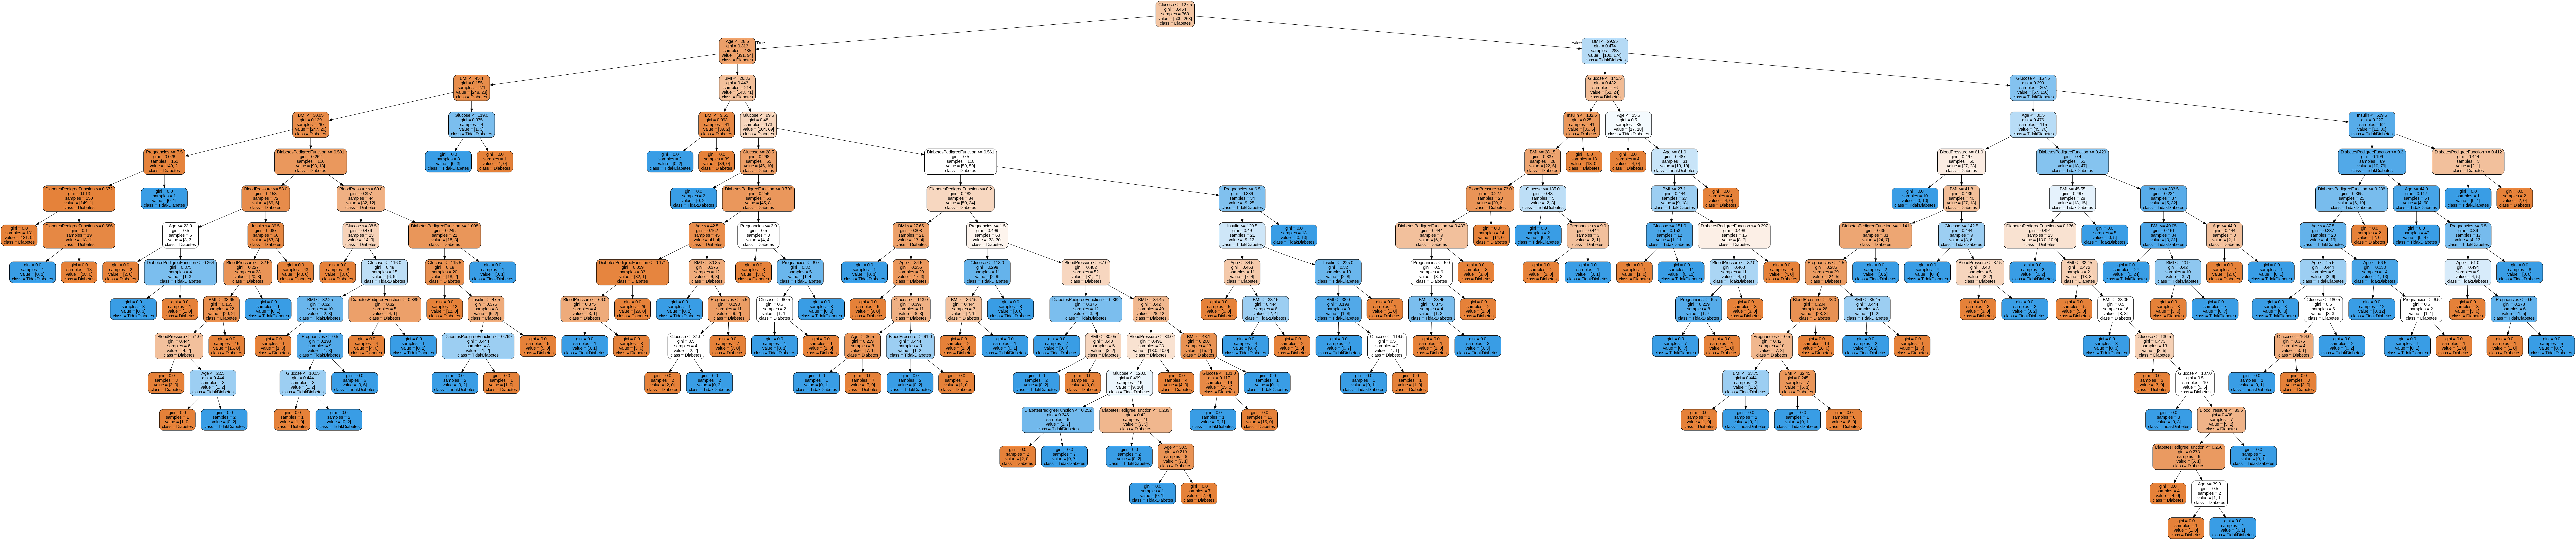

In [17]:
from subprocess import check_call
check_call(['dot', '-Tpng', 'diabetes_tree.dot', '-o', 'diabetes_tree.png'])

# proses menampilkan hasil output
from IPython.display import Image, display
display(Image('diabetes_tree.png'))
